In [2]:
# Que1.-
# Predict if a person would buy life insurance based on his age using logistic regression and naive bayes.
# About Dataset - Age: Age of a person
# bought_insurance : whether person buys Insurance or not (0 - No, 1 - Yes)
# predict it for Age : 58,30,20,49,53
# Dataset : insurance_data.csv
# Calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score, roc auc score, precision, recall.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('insurance_data.csv')
df.head(3)

,age,bought_insurance
0,22,0
1,25,0
2,47,1


In [3]:
X = df.drop('bought_insurance',axis = 1)
Y = df[['bought_insurance']]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [54]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [6]:
df.corr()

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


<Axes: >

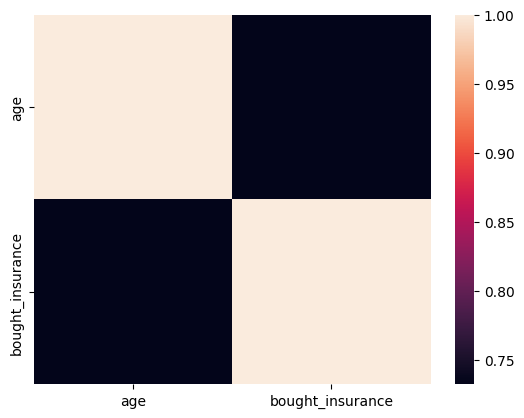

In [8]:
sns.heatmap(df.corr())

In [9]:
# split the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size = 0.7, random_state = 12345)



In [71]:
#create the model
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()
model.fit(x_train,y_train)

/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

In [76]:
y_true = y_test
y_pred = model.predict(x_test)


In [77]:
model.predict_proba(x_test)

array([[0.33998237, 0.66001763],
       [0.20048768, 0.79951232],
       [0.61773849, 0.38226151],
       [0.60769049, 0.39230951],
       [0.52469221, 0.47530779],
       [0.5352402 , 0.4647598 ],
       [0.27691975, 0.72308025],
       [0.50353942, 0.49646058],
       [0.25221578, 0.74778422]])

In [78]:
# depending on the above data the model predicts the classification value  as 0 and 1
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1])

In [19]:
#evaluate the module 
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm
tn,fp,fn,tp  = cm.ravel()

In [22]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"accuracy = {accuracy * 100:.2f}%")

accuracy = 88.89%


In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print(f"accuracy = {accuracy * 100:.2f}%")

accuracy = 88.89%


In [23]:
precision = tp / (tp + fp)
print(f"precision of +ve = {precision * 100:.2f}%")

precision of +ve = 75.00%


In [27]:
precision_positive = tp / (tp + fp)
print(f"precision of +ve = {precision_positive * 100:.2f}%")

precision of +ve = 75.00%


In [28]:
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred)
print(f"precision of +ve = {precision * 100:.2f}%")

precision of +ve = 75.00%


In [29]:
recall_positivce = tp / (tp + fn)
print(f"recall for +ve = {recall_positivce * 100:.2f}%")

recall for +ve = 100.00%


In [30]:
from sklearn.metrics import recall_score
recall_positivce = recall_score(y_true, y_pred)
print(f"recall for +ve = {recall_positivce * 100:.2f}%")

recall for +ve = 100.00%


In [31]:
f1_positive = 2 * ((precision_positive * recall_positivce) / (precision_positive + recall_positivce))
print(f"F1 for +ve = {f1_positive:.2f}")

F1 for +ve = 0.86


In [32]:
from sklearn.metrics import f1_score
f1_positive = f1_score(y_true, y_pred)
print(f"F1 for +ve = {f1_positive:.2f}")

F1 for +ve = 0.86


In [79]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.75      1.00      0.86         3

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9



Text(0.5, 1.0, 'Classification visualization')

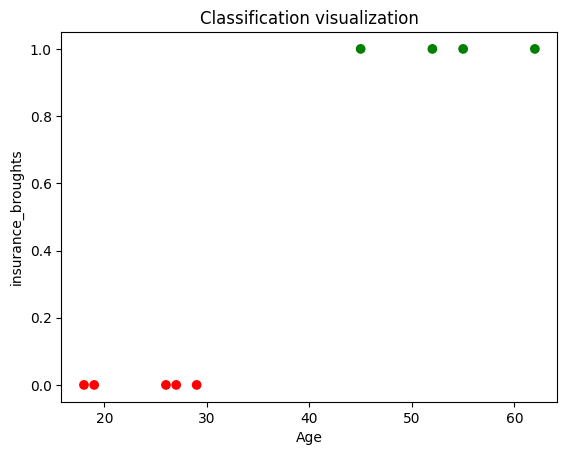

In [80]:
colors = []
for value in y_pred:
    colors.append("green" if value == 1 else "red")
    
plt.scatter(x_test['age'],y_pred, color=colors)
plt.xlabel('Age')
plt.ylabel('insurance_broughts')
plt.title('Classification visualization')

In [81]:
y_pred_new = model.predict([[58],[30],[20],[49],[53]])
y_pred_new


/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


array([1, 1, 0, 1, 1])